# Matplotlib Part 5

## Filling Area on Line Plots


Link to tutorial: [Watch here](https://youtu.be/x0Uguu7gqgk)

In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

In [3]:
path_df = 'data/survey_results_public.csv'
path_schema = 'data/survey_results_schema.csv'

#Options to actually see all rows and columns
pd.set_option('display.max_columns', 85) # Can also be displayed to the number of columns
pd.set_option('display.max_rows', 20)

# Set the display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv(path_df, index_col = 'Respondent') # Setting index when creating dataframe
schema_df = pd.read_csv(path_schema, index_col = 'Column')
schema_df.sort_index(inplace=True)
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,I

In [4]:
# How to specifically choose columns where we don't want missing values
df.dropna(axis = 'index', how = 'any', subset = ['Age','LanguageWorkedWith','ConvertedComp'], inplace =True)
df.shape

(53344, 84)

In [5]:
df['LanguageWorkedWith'].str.contains('Python')

Respondent
3        False
4         True
6        False
9         True
13       False
         ...  
88877    False
88878    False
88879     True
88881     True
88883    False
Name: LanguageWorkedWith, Length: 53344, dtype: bool

In [6]:
# Median salary of a developer based on their age
# Filter ages between 18 and 55
filt_age_range = (df['Age']>=18) & (df['Age']<=55)
# Filter only integer ages
filt_age_int = (df['Age']*100 % 100 == 0)
filt_python = (df['LanguageWorkedWith'].str.contains('Python'))

df_age = df.loc[filt_age_range & filt_age_int]

# Grouping by age and calculating the median
age_grp = df_age.groupby(['Age'])
age_comp_series = age_grp['ConvertedComp'].median()

# Checking we did the right filtering and grouping
age_comp_series

Age
18.00    13750.00
19.00    14506.00
20.00    16000.00
21.00    19236.00
22.00    23769.50
           ...   
51.00   100931.50
52.00   100000.00
53.00   109082.00
54.00   104227.50
55.00   104202.00
Name: ConvertedComp, Length: 38, dtype: float64

In [7]:
# Filter rows where 'Python' is in 'LanguageWorkedWith'
filt_python = df_age['LanguageWorkedWith'].str.contains('Python')
df_python = df_age[filt_python]
# Grouping by age and calculating the median for Python developers
age_grp_python = df_python.groupby('Age')['ConvertedComp'].median()

# Filter rows where 'JavaScript' is in 'LanguageWorkedWith'
filt_js = df_age['LanguageWorkedWith'].str.contains('JavaScript')
df_js = df_age[filt_js]
# Grouping by age and calculating the median for JavaScript developers
age_grp_js = df_js.groupby('Age')['ConvertedComp'].median()

In [8]:
# Combining the results into a single DataFrame
df_devs = pd.DataFrame({
    'AllDevs': age_comp_series,
    'PythonDevs': age_grp_python,
    'JSDevs': age_grp_js
})

# Print the combined DataFrame
df_devs

,AllDevs,PythonDevs,JSDevs
Age,,,
18.00,13750.00,15396.00,14065.00
19.00,14506.00,15699.00,14784.00
20.00,16000.00,18444.00,17004.00
21.00,19236.00,20628.00,19794.00
22.00,23769.50,30000.00,24048.00
...,...,...,...
51.00,100931.50,111179.00,100000.00
52.00,100000.00,105704.50,100703.50
53.00,109082.00,114575.00,109419.00


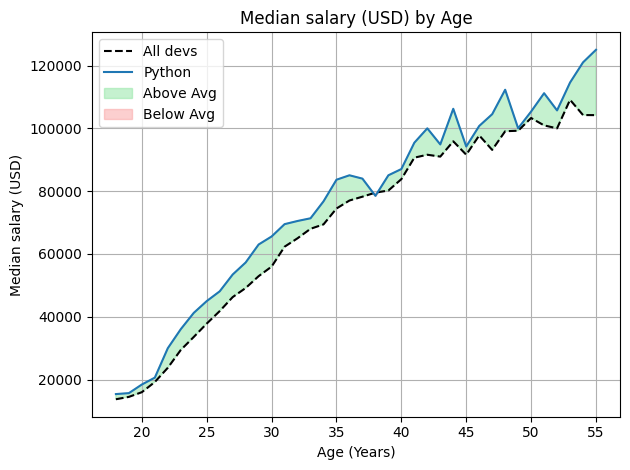

In [9]:
ages = df_devs.index
dev_salaries = df_devs['AllDevs']
py_salaries = df_devs['PythonDevs']
js_salaries = df_devs['JSDevs']

plt.rcdefaults()
#plt.style.use('seaborn-v0_8-pastel')

plt.plot(ages, dev_salaries, label = 'All devs', linestyle = '--', color = 'k')
plt.plot(ages, py_salaries, label = 'Python')

plt.xlabel('Age (Years)')
plt.ylabel('Median salary (USD)')
plt.title('Median salary (USD) by Age')

# Filling

overall_median =  57287
plt.fill_between(ages, py_salaries, dev_salaries, 
                 where = (py_salaries > dev_salaries),
                 interpolate = True,
                 color = '#8de5a1', alpha=0.5, label = 'Above Avg')

plt.fill_between(ages, py_salaries, dev_salaries, 
                 where = (py_salaries < dev_salaries),
                 interpolate = True,
                 color = '#FAA0A0', alpha=0.5, label = 'Below Avg')

# To use this method, you have to know the orden in which the lines were added to the plot
plt.legend()


# Method to add grid
plt.grid(True, which = 'both', axis = 'both')
# Customizing the grid appearance

# Method to add some padding
plt.tight_layout()

# Save plot
# plt.savefig('plot.png')

# Draw plot
plt.show()